In [29]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\kunja\anaconda3\lib\site-packages\huggingface_hub-0.17.3-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\kunja\anaconda3\lib\site-packages\huggingface_hub-0.17.3-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [31]:
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
import datetime
from random import randint
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlparse, parse_qs, urlunparse, urlencode


HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

# Base URL with a year parameter
base_url = 'https://www.imdb.com/search/title/?year='

movie_array=[]

# Define a list of years to loop through
start_year = 2010
end_year = 2011
years = range(start_year, end_year)
count=1
max_requests = 70 # Set the maximum number of requests allowed
request_count = 0
pages = np.arange(1, 251, 50)

for year in years:
  # sleep(randint(8,15))
   for page in pages:
      #sleep(randint(8,15))
    
         #concatenating the url with and creating a target url
      url_year = base_url + str(year)+'&start='+str(page)
      try:
              response = requests.get(url_year, headers=HEADERS)

              #throw warning for status codes that are not 200
              if response.status_code != 200:
                 warn('Request: {}; Status code: {}'.format(requests, response.status_code))
              soup = BeautifulSoup(response.text,'lxml')
              request_count=request_count+1
              
              #check for max request
              if(request_count>max_requests):
                break
              
              #sleep(randint(8,15))

              
              container=soup.findAll('li',class_="ipc-metadata-list-summary-item")
              
              for moviecontainer in container:
                score= moviecontainer.find('span',class_="metacritic-score-box")

                if score is not None:
                 
                  title= moviecontainer.h3.text.strip('-,() ')[3:]
                  # print(title)
                  metascore=score.text.strip()
                  
                  #year_o= moviecontainer.find(class_='lister-item-year').text.strip('-,() ')[-4:]
                  year= moviecontainer.find('span',class_="dli-title-metadata-item").text
                 
                  rating= moviecontainer.find('span',class_="ipc-rating-star--imdb").text.strip('-,() ').encode('utf-8','ignore').decode('utf-8')[0:4]
                  
                  # votes = moviecontainer.find('span', {'name': 'nv'}).text.strip()
                  votes = moviecontainer.find('div', class_="jmcDPS").text.strip('-,() ')[-6:]
                  # print(votes)
                  movie_array.append([title,year,metascore,rating,votes])



      except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")

df = pd.DataFrame(movie_array, columns=['Title','Year','Metascore','Rating','Votes'])
df.head()


,Title,Year,Metascore,Rating,Votes
0,Scott Pilgrim vs. the World,2010,69,7.5,"53,432"
1,Inception,2010,74,8.8,"87,586"
2,Legion,2010,32,5.3,"10,102"
3,The Social Network,2010,95,7.8,"41,754"
4,Shutter Island,2010,63,8.2,"10,142"


In [32]:
df.to_csv('web-scrapping-movies1.csv', encoding='utf-8')

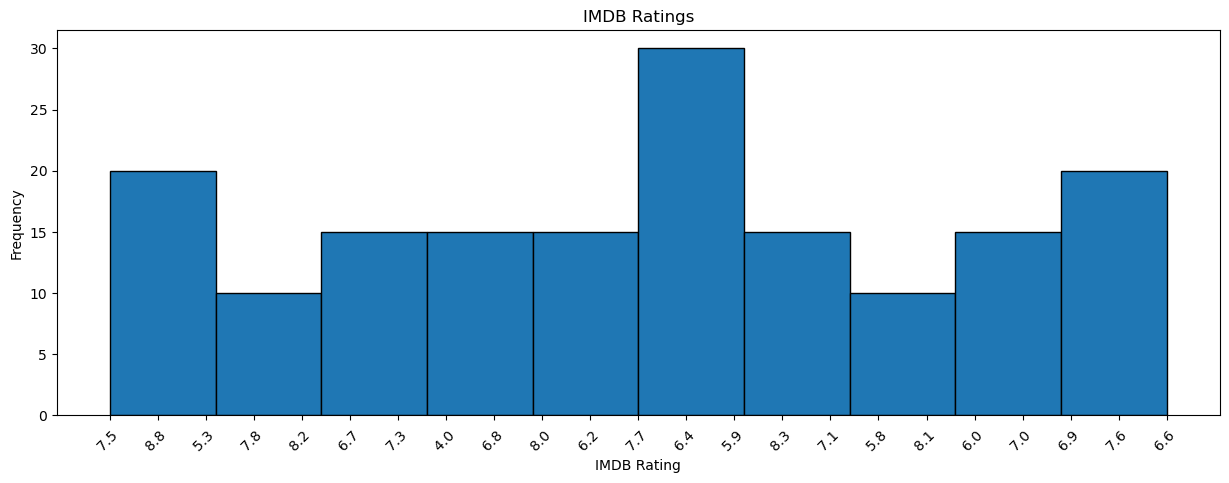

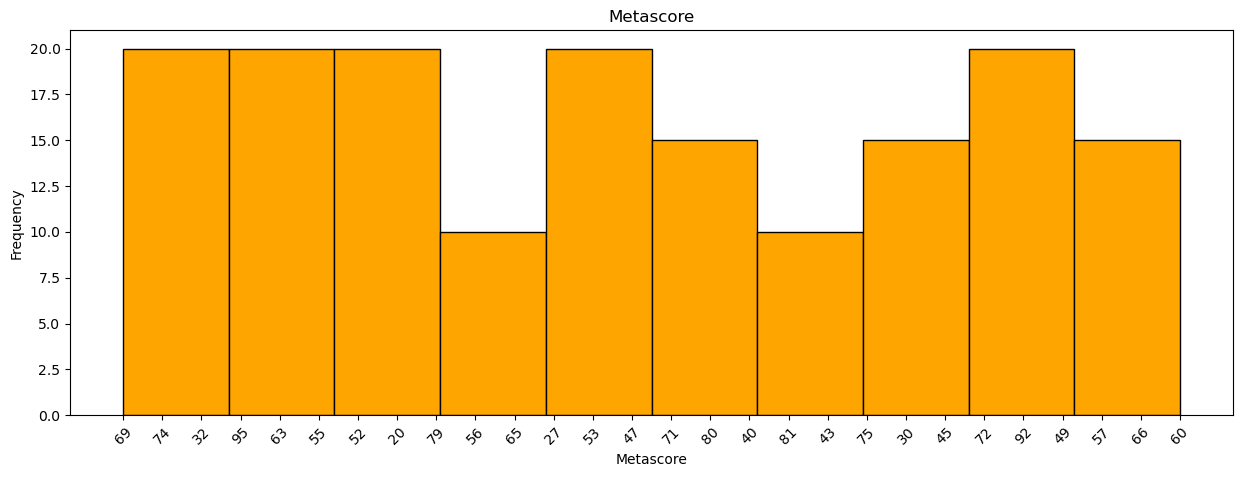

In [24]:
# Plot histograms
plt.figure(figsize=(15, 5))

# Histogram for IMDb ratings
plt.hist(df['Rating'], bins=10, edgecolor='k')
plt.title('IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# Histogram for Metascore ratings
plt.figure(figsize=(15, 5))
plt.hist(df['Metascore'], bins=10, edgecolor='k', color='orange')
plt.title('Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()





